In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [253]:
creditCustomers = pd.read_csv("../data/project/ds.csv")
#creditCustomers

creditcustomers_small = creditCustomers.iloc[:,1:]
creditcustomers_small = creditcustomers_small.rename(columns={'FICO V2 Score':'F02_SCORE',  'FICO V3 Score':'F03_SCORE', 'FICO V08 Score':'F08_SCORE'})
creditcustomers_small = creditcustomers_small.loc[creditcustomers_small['F02_SCORE'] < 1000]

#Removing customers with credit score > 800 and declined
creditcustomers_small = creditcustomers_small.loc[(creditcustomers_small['F02_SCORE'] < 800) 
                | ((creditcustomers_small['F02_SCORE'] >= 800) & (creditcustomers_small['Status'] == 'APPROVED'))]
creditcustomers_small = creditcustomers_small.loc[(creditcustomers_small['F03_SCORE'] < 800) 
                | ((creditcustomers_small['F03_SCORE'] >= 800) & (creditcustomers_small['Status'] == 'APPROVED'))]
creditcustomers_small = creditcustomers_small.loc[(creditcustomers_small['F08_SCORE'] < 800) 
                | ((creditcustomers_small['F08_SCORE'] >= 800) & (creditcustomers_small['Status'] == 'APPROVED'))]

#No need to run the below as all that have score > 1000 have the same value for all columns
#creditcustomers_small = creditcustomers_small.loc[creditcustomers_small['F03_SCORE'] < 1000]
#creditcustomers_small = creditcustomers_small.loc[creditcustomers_small['F08_SCORE'] < 1000]

#creditcustomers_small

In [254]:
#Replacing status APPROVED to 1
creditcustomers_small.replace(to_replace={'Status':"APPROVED"}, value=1, inplace=True)
#Replacing status DECLINED to 0
creditcustomers_small.replace(to_replace={'Status':"DECLINED"}, value=0, inplace=True)



creditcustomers_small

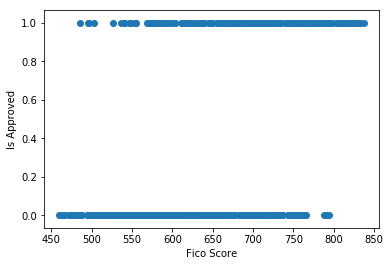

In [255]:
plt.xlabel("Fico Score")
plt.ylabel("Is Approved")
plt.scatter(creditcustomers_small['F02_SCORE'], creditcustomers_small['Status'])

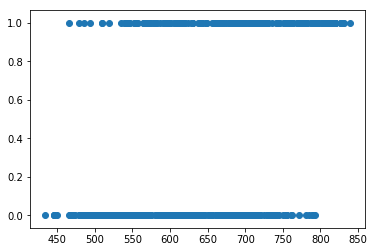

In [256]:
plt.scatter(creditcustomers_small['F03_SCORE'], creditcustomers_small['Status'])

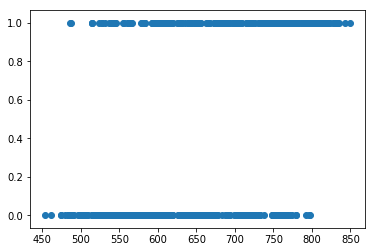

In [257]:
plt.scatter(creditcustomers_small['F08_SCORE'], creditcustomers_small['Status'])

In [287]:
from sklearn.model_selection import train_test_split
 

feature_vector = creditcustomers_small.iloc[:,0:3] # What is hte feature vector (gpa, gre, rank)
labels = creditcustomers_small['Status']# What is the label (admit) 
    
train_x, test_x, train_y, test_y = train_test_split(feature_vector, 
                                                    labels, test_size=0.3)
print("training set = " , len(train_x))
print("testing set = " , len(test_x))

training set =  395
testing set =  170


In [288]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

# Fit the model
lrModel = lr.fit(train_x, train_y)

print(lrModel.coef_)

[[ 0.002312    0.01312575 -0.0086472 ]]


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [289]:
from sklearn.metrics import confusion_matrix

predictions = lrModel.predict(test_x)
confusion_matrix(test_y, predictions)

array([[74, 16],
       [30, 50]])

In [290]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(test_y, predictions)
roc_auc = auc(fpr, tpr)

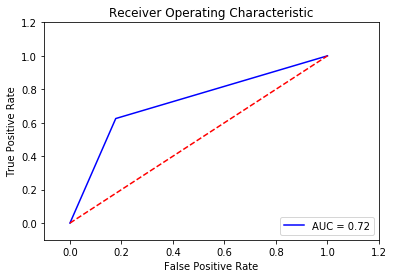

In [291]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [292]:
from sklearn.metrics import accuracy_score

predictions = lrModel.predict(test_x)
accuracy_score(test_y, predictions)


0.7294117647058823